In [ ]:
# Assignment 1 - Income Prediction via Multimodel Supervised Learning Algorithms

In [ ]:
# I used seven python algorithms to complete this assignment: Gradient Tree Boosting,Decision Tree,XGBoost,Random Forest,SVM,Light GBM,Naive Bayes.
# The algorithm that I found to work best on this task was XGBoost.
# In this notebook,I will report how I process the data, compare the performance of different algorithms, select the best algorithm and adjust the relevant parameters.

In [ ]:
# Data Processing

import pandas as pd
import numpy as np

#Load data
data_training=pd.read_csv('census-income-training.csv',header=0)
data_test=pd.read_csv('census-income-test.csv',header=0)

#Split the data into features and target label and drop invalid feature
#I found there were "? "in these columns below,so I delete these columns.
#In addition, I found that all values were the same in column PARENT, so I delete this column too.
invalid_feature = 'GRINREG','MIGMTR1','MIGMTR3','MIGSAME','PARENT','PEFNTVTY','PEMNTVTY','PENATVTY'
income_raw_training = data_training['income_morethan_50K']
features_raw_training = data_training.drop(['income_morethan_50K','Id','GRINREG','MIGMTR1','MIGMTR3','MIGSAME','PARENT','PEFNTVTY','PEMNTVTY','PENATVTY'],axis=1)
features_raw_test = data_test.drop(['Id','GRINREG','MIGMTR1','MIGMTR3','MIGSAME','PARENT','PEFNTVTY','PEMNTVTY','PENATVTY'],axis=1)

#Transforming Skewed Continuous Features
#I find some values tend to lie near a single number, or whose values have a non-trivial number of vastly larger or smaller values than that single number
#So I apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of the learning algorithms.
#Since the logarithm of 0 is undefined, I use a logarithmic transformation with an addition by a small amount above 0.
#Since the logarithm of 0 is undefined, we translate the values by a small amount above 0 to apply the the logarithm successfully.
skewed = ['AHRSPAY','CAPGAIN', 'CAPLOSS','DIVVAL']
features_log_transformed_training = pd.DataFrame(features_raw_training)
features_log_transformed_training[skewed] = features_raw_training[skewed].apply(lambda x: np.log(x + 1))
features_log_transformed_test = pd.DataFrame(features_raw_test)
features_log_transformed_test[skewed] = features_raw_test[skewed].apply(lambda x: np.log(x + 1))

#Normalizing Numerical Features
#Of all the features, the values of some discrete variables vary a lot,so I implement a normalization procedure.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
numerical = ['AAGE', 'ADTOCC', 'AHRSPAY', 'CAPGAIN','CAPLOSS', 'DIVVAL','HHDREL','NOEMP']
features_log_minmax_transform_training = pd.DataFrame(features_log_transformed_training)
features_log_minmax_transform_training[numerical] = scaler.fit_transform(features_log_transformed_training[numerical])
features_log_minmax_transform_test = pd.DataFrame(features_log_transformed_test)
features_log_minmax_transform_test[numerical] = scaler.fit_transform(features_log_transformed_test[numerical])

#Convert Categorical Variables
#I use a one-hot encoding procedure to create a "dummy" variable for each possible category of each non-numeric feature.
features_training_final = pd.get_dummies(features_log_minmax_transform_training)
features_test_final = pd.get_dummies(features_log_minmax_transform_test)
income_training_final= income_raw_training



In [ ]:
#Algorithms:GTB,Desicion Tree,Xgboost,Random forest,SVM,Naive Bayes

#Split the Data into Training and Test Sets
#I first used train data to check the performance of each algorithm
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_training_final,income_training_final,test_size = 0.2,random_state = 0)

#GTB
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
GTB = GradientBoostingClassifier()
GTB.fit(x_train,y_train)
GTB_y_predict=GTB.predict(x_test)
GTB.score(x_test,y_test)

print('score of Desicion Tree')
print(GTB.score(x_test,y_test))

from sklearn.metrics import classification_report
print('Prediction accuracy of GTB')
print(classification_report(y_test,GTB_y_predict))

#Desicion Tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_y_predict=dt.predict(x_test)
dt.score(x_test,y_test)

print('score of Desicion Tree')
print(dt.score(x_test,y_test))

print('Prediction accuracy of Desicion Tree')
print(classification_report(y_test,dt_y_predict))

#Xgboost
from xgboost import XGBClassifier
xgbc=XGBClassifier()
xgbc.fit(x_train,y_train)
xgbc_y_predict=xgbc.predict(x_test)
xgbc.score(x_test,y_test)

print('score of XGBoost')
print(xgbc.score(x_test,y_test))

print('Prediction accuracy of XGBoost')
print(classification_report(y_test,xgbc_y_predict))

#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_y_predict=rfc.predict(x_test)
rfc.score(x_test,y_test)

print('score of random forest')
print(rfc.score(x_test,y_test))

print('Prediction accuracy of random forest')
print(classification_report(y_test,rfc_y_predict))

#SVM
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)
svm_y_predict=svm.predict(x_test)
svm.score(x_train, y_train)

print('score of SVM')
print(svm.score(x_train, y_train) )

print('Prediction accuracy of SVM')
print(classification_report(y_test, svm_y_predict))

#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(x_train,y_train)
MNB_y_predict=MNB.predict(x_test)
MNB.score(x_test,y_test)

print('score of Desicion Tree')
print(MNB.score(x_test,y_test))

print('Prediction accuracy of Bayesian Network')
print(classification_report(y_test,MNB_y_predict))

#I also tried another algorithm Light GBM, but didn't include it in the comparison because it was a simple GTB.

#Due to computer performance problems, please check the corresponding files for specific codes and results of each algorithm

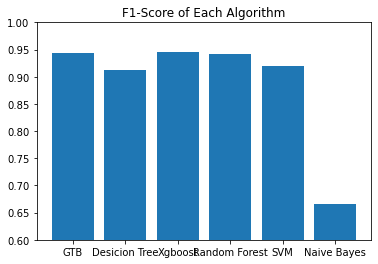

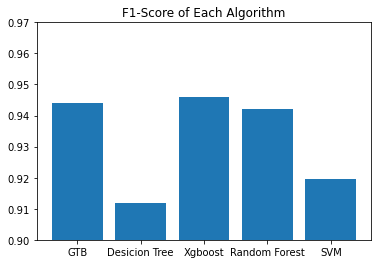

In [11]:
#The Performance of Each Algorithm
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

num_list_score =[0.9439988116458705,0.9119132501485443,0.9459298871063577,0.9422162804515746,0.9197118241235889,0.6665181224004754]
name_list_score=['GTB','Desicion Tree','Xgboost','Random Forest','SVM','Naive Bayes']
plt.bar(range(len(num_list_score)),num_list_score,tick_label=name_list_score)
plt.title('F1-Score of Each Algorithm')
plt.ylim(0.6,1)
plt.show() 


num_list_score =[0.9439988116458705,0.9119132501485443,0.9459298871063577,0.9422162804515746,0.9197118241235889]
name_list_score=['GTB','Desicion Tree','Xgboost','Random Forest','SVM']
plt.bar(range(len(num_list_score)),num_list_score,tick_label=name_list_score)
plt.title('F1-Score of Each Algorithm')
plt.ylim(0.9,0.97)
plt.show() 

#According to the score and accuracy of each algorithm,I found XGBoost to be the best.
#Next, I'll use the XGBoost algorithm for further analysis.

In [ ]:
#Use another way to process data
#After discussion with my teammates, I tried to label the missing value NA as a specific label for analysis, and the code is as follows.

#data_training_clean=data_training.replace(regex=[r'\?'],value=np.nan)
#data_training=data_training_clean.fillna(0)

#But it turns out that the prediction effect is not as good as deleting these columns.
#Therefore, in the subsequent analysis, I will adopt the original data processing method.

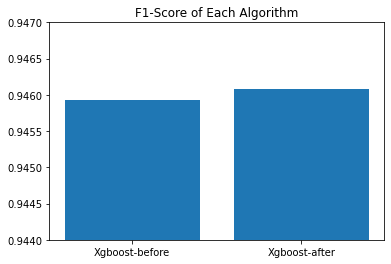

In [15]:
#Parameter optimization
# I used GridSearchCV to test the best parameters
#I test the optimal values for max_depth, min_child_weight,gamma,subsample,colsample_bytree
#Only the adjusted results are shown here
#Please refer to Assignment 1 (Adjust the parameters) -xgboost for details

num_list_score =[0.9459298871063577,0.946078431372549]
name_list_score=['Xgboost-before','Xgboost-after']
plt.bar(range(len(num_list_score)),num_list_score,tick_label=name_list_score)
plt.title('F1-Score of Each Algorithm')
plt.ylim(0.944,0.947)
plt.show() 


In [ ]:
#Prediction
#After selecting the optimal algorithm and adjusting the relevant parameters, we use this model for prediction,the code are as follow

xgbc=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=3,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.85,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgbc.fit(x_train,y_train)
xgbc_y_predict=xgbc.predict(x_test)
xgbc_predict = pd.DataFrame(xgbc_y_predict,columns=['income_morethan_50K'])
xgbc_predict.to_csv('xgbc_predict.csv')

In [ ]:
#Unfortunately, when I compared the predictions uploaded to Kaggle, I found that XGBoost, with its default parameters, did the best.
#Could you please tell me why?